# **Sale Price Study**

## Objectives

*   Answer business requirement 1: 
    * The client is interested in discovering how the house attributes correlate with the sale price. Therefore, the client expects data visualisations of the correlated variables against the sale price to show that.

## Inputs

* outputs/datasets/collection/house_prices_records.csv

## Outputs

* generate code that answers business requirement 1 and can be used to build the Streamlit App




---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/milestone-project-5/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/milestone-project-5'

---

# Load Data

Output data is loaded into this notebook and the top three entries displayed 

In [4]:
import pandas as pd
df = (pd.read_csv("outputs/datasets/collection/house_prices_records.csv"))
df.head(3)


,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,1,706,6.0,150,0.0,548,2.0,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,4,978,5.0,284,NaN,460,2.0,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,2,486,6.0,434,0.0,608,2.0,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500


---

# Data Exploration

We are interested to get more familiar with the dataset, check variable type and distribution, missing levels and what these variables mean in a business context

In [5]:
from ydata_profiling import ProfileReport
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

- The data is all numerical as expected following the replacing of categorical types in the previous notebook.
- There is a large amount of missing data (~10%) which will need to review in future.
- There is a large variations between all the houses, as some do not have a 2nd floor, garage or baseent.
    - As a result some of the data is skewed with higher number of zero's and will need consideration for future.
- The majority of the data is not uniformly distritubed.

---

# Correlation Study

We use `.corr()` for `spearman` and `pearson` methods, and investigate the top 10 correlations
* We know this command returns a pandas series and the first item is the correlation between SalePrice and SalePrice, which happens to be 1, so we exclude that with `[1:]`
* We sort values considering the absolute value, by setting `key=abs`

In [6]:
import pandas as pd
df = (pd.read_csv("outputs/datasets/collection/house_prices_records.csv"))   
df.head(3)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,1,706,6.0,150,0.0,548,2.0,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,4,978,5.0,284,NaN,460,2.0,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,2,486,6.0,434,0.0,608,2.0,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500


In [7]:
corr_spearman = df.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(24)
corr_spearman

OverallQual      0.809829
GrLivArea        0.731310
KitchenQual      0.672849
YearBuilt        0.652682
GarageArea       0.649379
GarageFinish     0.636076
TotalBsmtSF      0.602725
GarageYrBlt      0.593788
1stFlrSF         0.575408
YearRemodAdd     0.571159
OpenPorchSF      0.477561
LotArea          0.456461
MasVnrArea       0.421309
LotFrontage      0.409076
BsmtFinType1     0.365403
BsmtExposure     0.344207
BsmtFinSF1       0.301871
2ndFlrSF         0.298809
WoodDeckSF       0.252176
BedroomAbvGr     0.229527
EnclosedPorch   -0.215010
BsmtUnfSF        0.185197
OverallCond     -0.129325
Name: SalePrice, dtype: float64

In [8]:
corr_pearson = df.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(24)
corr_pearson

OverallQual      0.790982
GrLivArea        0.708624
KitchenQual      0.659600
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
GarageFinish     0.544382
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtExposure     0.374696
LotFrontage      0.351799
2ndFlrSF         0.322335
OpenPorchSF      0.315856
BsmtFinType1     0.302047
LotArea          0.263843
WoodDeckSF       0.252027
BsmtUnfSF        0.214479
EnclosedPorch   -0.176458
BedroomAbvGr     0.161901
OverallCond     -0.077856
Name: SalePrice, dtype: float64

In [9]:
top_n = 10
set(corr_pearson[:top_n].index.to_list() + corr_spearman[:top_n].index.to_list())

{'1stFlrSF',
 'GarageArea',
 'GarageFinish',
 'GarageYrBlt',
 'GrLivArea',
 'KitchenQual',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt',
 'YearRemodAdd'}

In [10]:
vars_to_study = ['1stFlrSF','GarageArea', 'GarageFinish', 'GarageYrBlt', 'GrLivArea', 'KitchenQual', 'OverallQual', 'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd']
vars_to_study

['1stFlrSF',
 'GarageArea',
 'GarageFinish',
 'GarageYrBlt',
 'GrLivArea',
 'KitchenQual',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt',
 'YearRemodAdd']

- For both methods, we notice strong and moderate correlations between SalePrice and selected variables. 
- Top 10 in Spearman and Top 9 in Pearson all show strong correlations.
    * We are able to pursue strong correlation levels and will review in more detail the top 10 correlations.

Therefore we are studying at df the following variables. We will investigate if:
* Larger floor space (GrLivArea, 1stFlrSF, GarageArea and TotalBsmtSF) increaes SalePrice
* Newer built properties (YearBuilt) are higher in SalePrice
* Recently built garages (GarageYrBlt) increases SalePrice
* Recent refurbishment (YearRemodAdd) increases SalePrice
* Higher quality kitchens, garages and overall houses (GarageFinish, KitchenQual and OveralQual) increases SalePrice


---

# EDA on selected variables

In [11]:
df_eda = df.filter(vars_to_study + ['SalePrice'])
df_eda.head(3)

,1stFlrSF,GarageArea,GarageFinish,GarageYrBlt,GrLivArea,KitchenQual,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,856,548,2.0,2003.0,1710,4,7,856,2003,2003,208500
1,1262,460,2.0,1976.0,1262,3,6,1262,1976,1976,181500
2,920,608,2.0,2001.0,1786,4,7,920,2001,2002,223500


We plot the distribution of each variable against SalePrice.
Quality related variables (KitchenQual, GarageFinish and OveralQual), altough numerical values are categorical categories and therefore reperesented as box plots.
The remaining vairbales are represented as scatter plots with linear regression lines

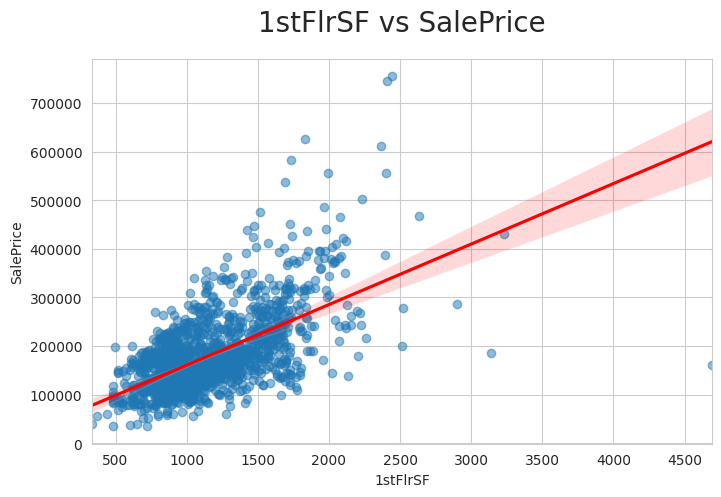

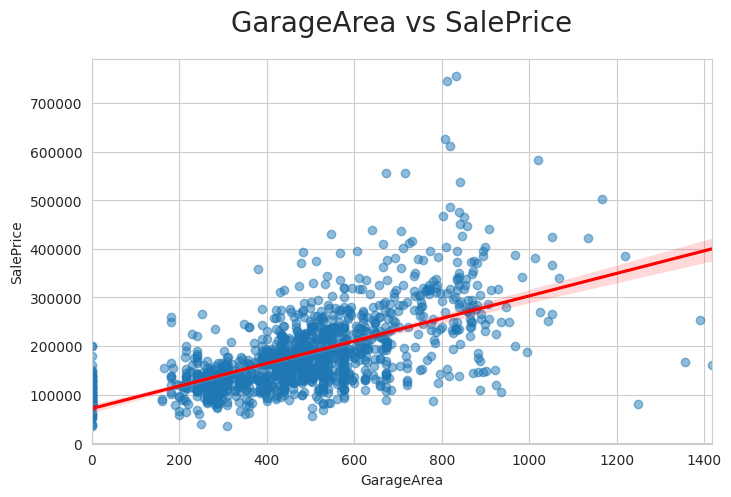

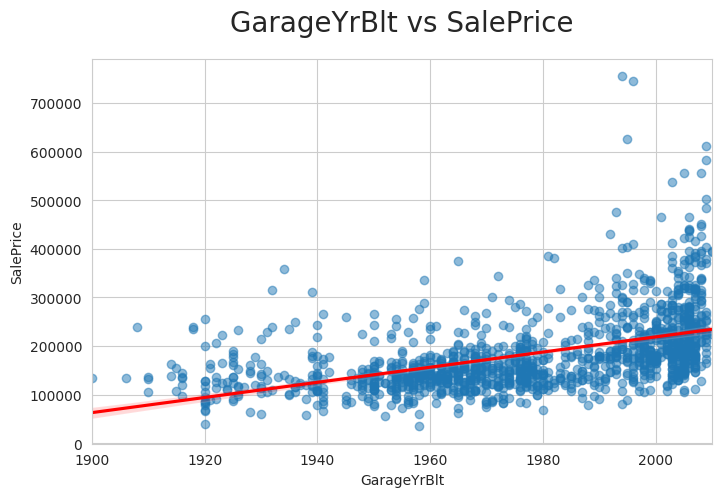

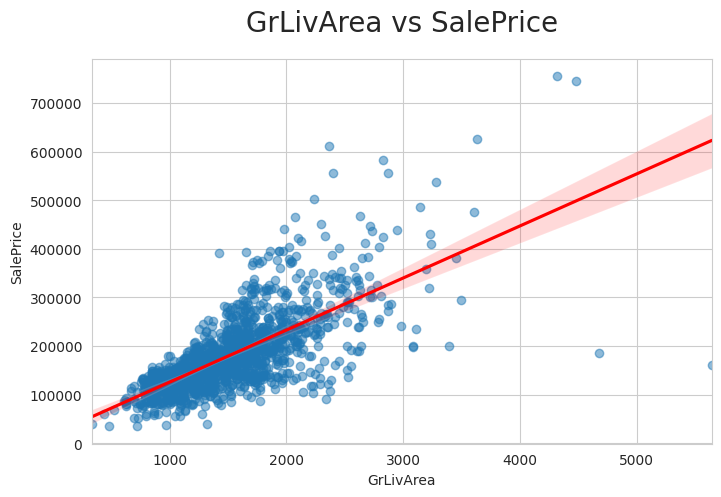

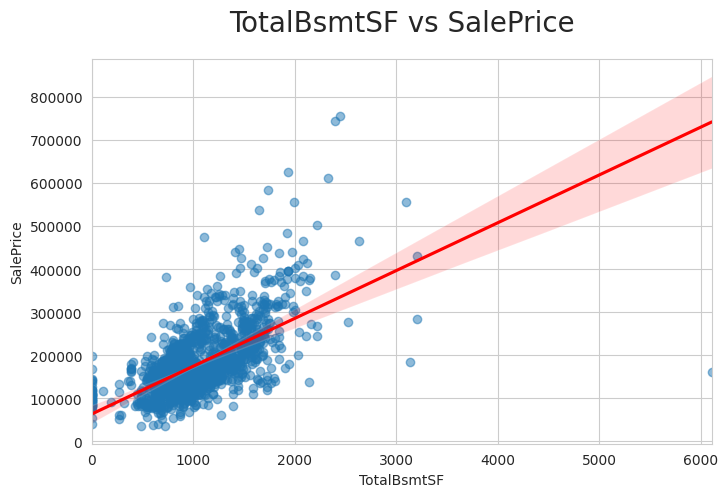

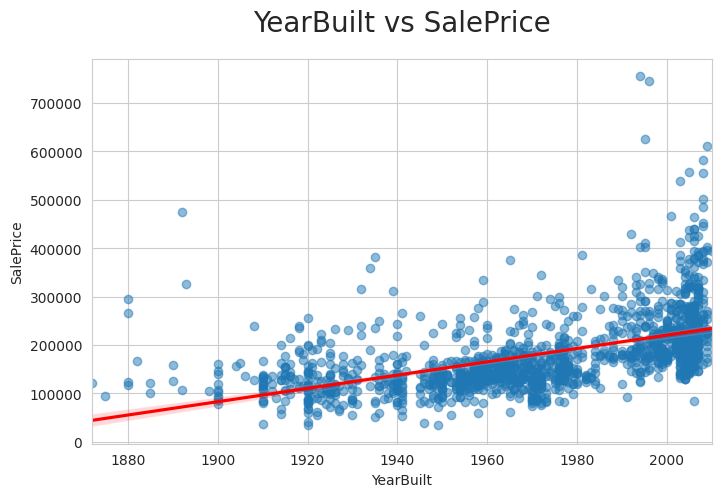

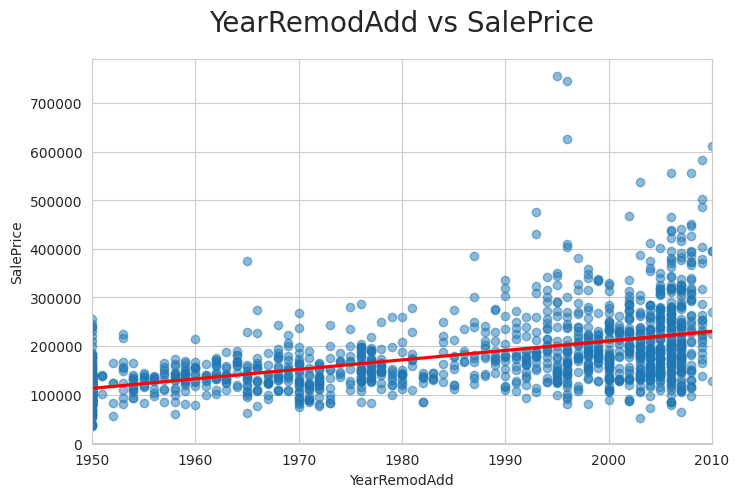

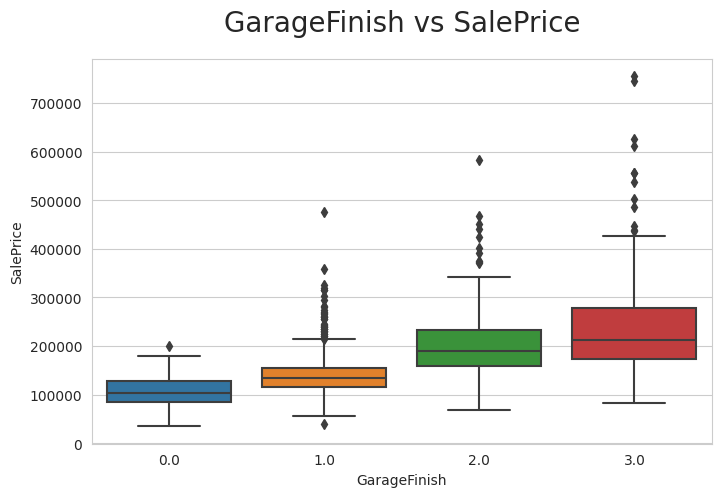

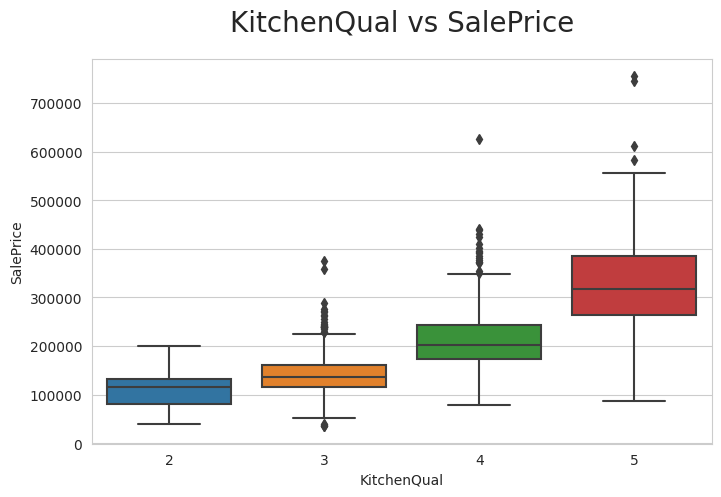

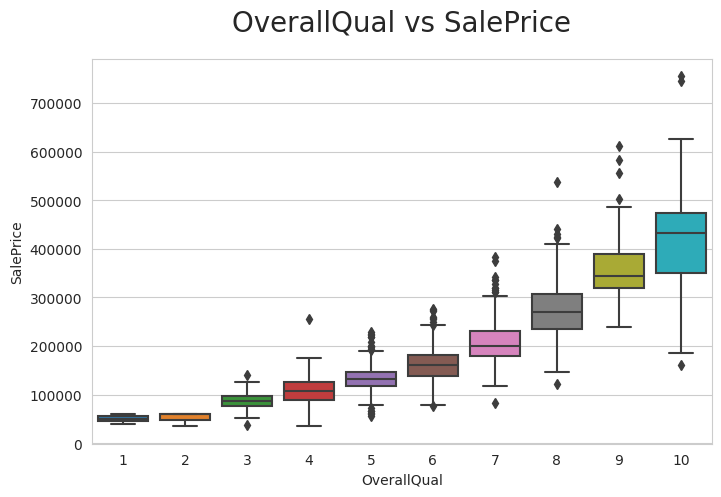

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

def plot_regression(df, col, target_var, alpha_scatter=0.5):
    plt.figure(figsize=(8, 5))
    sns.regplot(data=df, x=col, y=target_var, scatter_kws={'alpha': alpha_scatter}, line_kws={'color': 'red'})
    plt.title(f"{col} vs {target_var}", fontsize=20, y=1.05)
    plt.xlabel(col)
    plt.ylabel(target_var)
    plt.show()

def plot_boxplot(df, col, target_var):
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x=col, y=target_var)
    plt.title(f"{col} vs {target_var}", fontsize=20, y=1.05)
    plt.xlabel(col)
    plt.ylabel(target_var)
    plt.show()

target_var = 'SalePrice'
vars_to_study_numerical = ['1stFlrSF','GarageArea', 'GarageYrBlt', 'GrLivArea',  'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd']
vars_to_study_categorical = ['GarageFinish','KitchenQual', 'OverallQual']

for col in vars_to_study_numerical:
    plot_regression(df_eda, col, target_var)
    print("\n\n")

for col in vars_to_study_categorical:
    plot_boxplot(df_eda, col, target_var)
    print("\n\n")

---

# Total Floor Space

There are four variables that are related to floor space.
- 1stFlrSf is assumed to be included in GrLivArea.
- It is not clear if GarageArea is included in GrLivArea
- GrLivArea does not include below ground space, therefore assumption TotalBsmtSF is an additional feature to a property.


Therefore, we will combine GrLivArea and TotalBsmtSF to create a TotalLivArea and review if there is a stronger correlation to SalePrice

In [13]:
df_eda['TotalLivArea'] = df_eda['GrLivArea'] + df_eda['TotalBsmtSF']
df_eda.head(10)

,1stFlrSF,GarageArea,GarageFinish,GarageYrBlt,GrLivArea,KitchenQual,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice,TotalLivArea
0,856,548,2.0,2003.0,1710,4,7,856,2003,2003,208500,2566
1,1262,460,2.0,1976.0,1262,3,6,1262,1976,1976,181500,2524
2,920,608,2.0,2001.0,1786,4,7,920,2001,2002,223500,2706
3,961,642,1.0,1998.0,1717,4,7,756,1915,1970,140000,2473
4,1145,836,2.0,2000.0,2198,4,8,1145,2000,2000,250000,3343
5,796,480,1.0,1993.0,1362,3,5,796,1993,1995,143000,2158
6,1694,636,2.0,2004.0,1694,4,8,1686,2004,2005,307000,3380
7,1107,484,NaN,1973.0,2090,3,7,1107,1973,1973,200000,3197
8,1022,468,1.0,1931.0,1774,3,7,952,1931,1950,129900,2726
9,1077,205,2.0,1939.0,1077,3,5,991,1939,1950,118000,2068


Both correlations (Spearmane and Pearson) demonstrated a stronger correlation of TotalLivArea to SalePrice

In [14]:
corr_spearman_eda = df_eda.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(15)
corr_spearman_eda

TotalLivArea    0.814984
OverallQual     0.809829
GrLivArea       0.731310
KitchenQual     0.672849
YearBuilt       0.652682
GarageArea      0.649379
GarageFinish    0.636076
TotalBsmtSF     0.602725
GarageYrBlt     0.593788
1stFlrSF        0.575408
YearRemodAdd    0.571159
Name: SalePrice, dtype: float64

In [15]:
corr_pearson_eda = df_eda.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(24)
corr_pearson_eda

OverallQual     0.790982
TotalLivArea    0.778959
GrLivArea       0.708624
KitchenQual     0.659600
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GarageFinish    0.544382
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
Name: SalePrice, dtype: float64

We plot the new TotalLivArea column and note there visually appears less distribution of scatter plots away from the regression line. Combined with higher correlation scores.

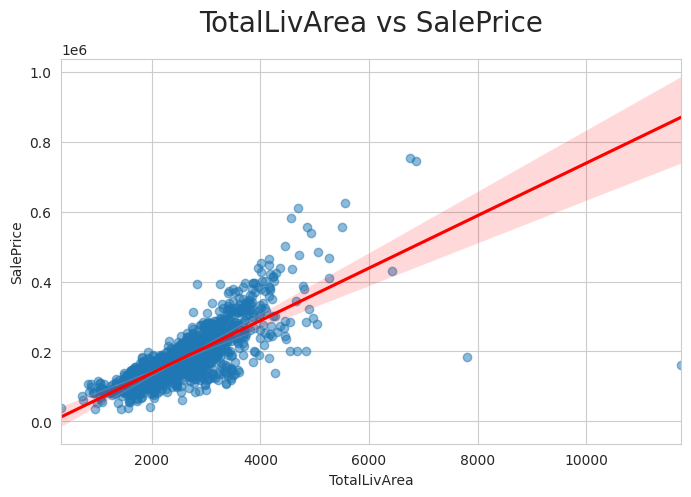

In [16]:
plot_regression(df_eda, 'TotalLivArea', target_var)

---

# Conclusion and Next Steps

The correlations and plots interpretation converge.
* Larger floor space (GrLivArea, 1stFlrSF, GarageArea and TotalBsmtSF) is associated with a higher SalePrice
    - Combined TotalLivArea, which includes above and below ground correlates stronger to a higher SalePrice.
    - GrLivArea has the highest individual correlation to a higher SalePrice.
* Newer built properties (YearBuilt) are higher in SalePrice.
* Recently built garages and refurbishments (GarageYrBlt, YearRemodAdd) are associated with a higher SalePrice
* Higher overall quality houses (OveralQual) are associated with a higher SalePrice
    - Higher quality kitchens and garages also contribute (less strong correlation) to a higher SalePrice (GarageFinish and KitchenQual) 